# Завдання 1: Визначення шаблонів зміни тривалості оренди велосипедів залежно від часу доби, дня тижня, сезону

In [54]:
import pandas as pd
import datetime
import time
import helpful_functions
import matplotlib.pyplot as plt
import warnings

from matplotlib.ticker import MultipleLocator

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
city_name = 'oslo'        # можливі варіанти: olso, bergen, trondheim

start_month = 4           # 1 - 12
start_year = 2019         # 2019 - 2022

end_month = 6             # 1 - 12
end_year = 2022           # 2019 - 2022

data_folder = './data'

In [3]:
dates_str_list = helpful_functions.generate_months_in_period(
    start_month=start_month, 
    start_year=start_year, 
    end_month=end_month, 
    end_year=end_year, 
    sep="_")

Зчитуємо дані.

In [4]:
start = time.time()
df = pd.read_csv(f"{data_folder}/{city_name}_{dates_str_list[0]}.csv")
for date in dates_str_list[1:]:
    df = pd.concat([df, pd.read_csv(f"{data_folder}/{city_name}_{date}.csv")])
end = time.time()
print("Зчитування: ", end - start, "с. \n")
print("Розмір початкової таблиці: ", df.shape)

Зчитування:  47.990216970443726 с. 

Розмір початкової таблиці:  (5833647, 13)


In [5]:
df.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337,401,Schous plass,nærmest Thorvald Meyers gate,59.920259,10.760629,381,Grønlands torg,ved Tøyenbekken,59.91252,10.76224
1,2019-04-02 22:25:54.203000+00:00,2019-04-02 22:27:36.114000+00:00,101,556,Pilestredet,ved Sporveisgata,59.926224,10.729625,556,Pilestredet,ved Sporveisgata,59.926224,10.729625
2,2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320,561,Kirkeveien,nord for Gørbitz' gate,59.933558,10.726426,471,Marienlyst,i Suhms gate,59.932454,10.721769
3,2019-04-03 03:09:58.992000+00:00,2019-04-03 03:12:00.589000+00:00,121,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,59.939244,10.774319,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,59.939244,10.774319
4,2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282,597,Fredensborg,ved rundkjøringen,59.920995,10.750358,557,Akersgata,ved Grensen,59.914197,10.742883


Трансформуємо 'started_at' і 'ended_at' в тип даних _datetime_. Потім з ним легше працювати ніж з _str_.

Мікросекунди видаляємо, бо там є дані без мікросекунд і це портить зчитування, а вони, мабуть, не багато вирішують.
Таймзону також видаляємо,вона всюди +00:00.

__Питання:__
> Чому таймзона +00:00? Мабуть варто перевести в таймзону Осло --- +02:00?

In [6]:
#strptime_pattern = "%Y-%m-%d %H:%M:%S.%f%z"
strptime_pattern = "%Y-%m-%d %H:%M:%S%z"

df['started_at_dt'] = df['started_at'].apply(lambda x: datetime.datetime.strptime(x[:-6].split('.')[0] + x[-6:], strptime_pattern))
df['ended_at_dt'] = df['ended_at'].apply(lambda x: datetime.datetime.strptime(x[:-6].split('.')[0] + x[-6:], strptime_pattern))

df.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,started_at_dt,ended_at_dt
0,2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337,401,Schous plass,nærmest Thorvald Meyers gate,59.920259,10.760629,381,Grønlands torg,ved Tøyenbekken,59.91252,10.76224,2019-04-02 22:18:47,2019-04-02 22:24:25
1,2019-04-02 22:25:54.203000+00:00,2019-04-02 22:27:36.114000+00:00,101,556,Pilestredet,ved Sporveisgata,59.926224,10.729625,556,Pilestredet,ved Sporveisgata,59.926224,10.729625,2019-04-02 22:25:54,2019-04-02 22:27:36
2,2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320,561,Kirkeveien,nord for Gørbitz' gate,59.933558,10.726426,471,Marienlyst,i Suhms gate,59.932454,10.721769,2019-04-02 22:26:39,2019-04-02 22:31:59
3,2019-04-03 03:09:58.992000+00:00,2019-04-03 03:12:00.589000+00:00,121,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,59.939244,10.774319,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,59.939244,10.774319,2019-04-03 03:09:58,2019-04-03 03:12:00
4,2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282,597,Fredensborg,ved rundkjøringen,59.920995,10.750358,557,Akersgata,ved Grensen,59.914197,10.742883,2019-04-03 03:10:02,2019-04-03 03:14:44


### Питання 1:
Чи є в нас пропуски в даних?

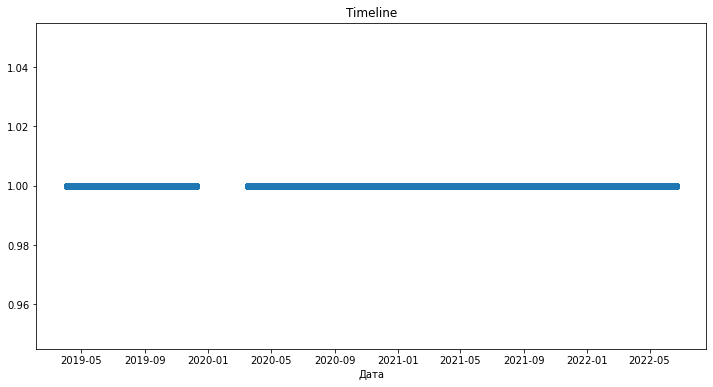

In [16]:
df_copy = pd.DataFrame()
df_copy = df[['started_at_dt']]
df_copy['1'] = 1

fig, ax = plt.subplots()
ax.scatter(x=df_copy['started_at_dt'], y=df_copy['1'])
ax.set_title('Timeline')
ax.set_xlabel('Дата')
plt.show()

Бачимо, що пропуск є. На початку 2020 року. Це схоже на зупинку роботи сервісу на зимовий час. В 2021 та 2022 таких зупинок не було.

In [34]:
print("Зимова перерва між: ")
print(df_copy[df_copy['year'] == 2019]['started_at_dt'].max())
print(df_copy[df_copy['year'] == 2020]['started_at_dt'].min())

Зимова перерва між: 
2019-12-08 22:59:18
2020-03-17 23:11:09


### Завдання 2
Подивитись динаміку кількості поїздок по роках.

Знаю, що 2019 і 2022 неповні.

In [35]:
df['start_year'] = df['started_at_dt'].apply(lambda x: x.year)

Text(0.5, 0, 'Рік')

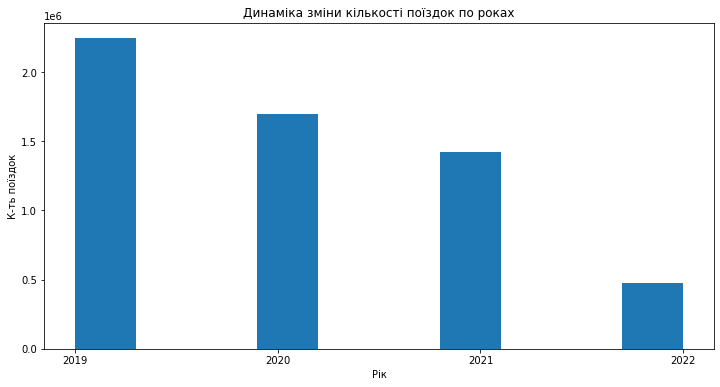

In [36]:
fig, ax = plt.subplots()
df['start_year'].plot.hist(xticks=df['start_year'].unique(), ax=ax)
ax.set_title('Динаміка зміни кількості поїздок по роках')
ax.set_ylabel('К-ть поїздок')
ax.set_xlabel("Рік")

__Ідея:__ подивитися зміну по другому кварталу кожного року, дані є. Це не вписується в питання про зміну трималості оренди, але цікаво в загальному. Бо виглядає ніби велосипеди втрачають актуальність... Чи варто це робити?

### Завдання 3
Зміна трималості оренди велосипедів в залежності від часу доби.

In [43]:
print("Duration stats: (in seconds)")
print('count: ', df['duration'].count())
print('mean: ', df['duration'].mean())
print('median: ', df['duration'].median())
print('min: ', df['duration'].min())
print('max: ', df['duration'].max())

Duration stats: (in seconds)
count:  5833647
mean:  781.3606694062908
median:  540.0
min:  61
max:  8685730


In [45]:
8685730 / 60 / 60 / 24

100.5292824074074

{'whiskers': [<matplotlib.lines.Line2D at 0x1acc98af0>,
 'caps': [<matplotlib.lines.Line2D at 0x1acca8190>,
 'boxes': [<matplotlib.lines.Line2D at 0x1acc98820>],
 'medians': [<matplotlib.lines.Line2D at 0x1acca8670>],
 'fliers': [<matplotlib.lines.Line2D at 0x1acca8940>],
 'means': []}

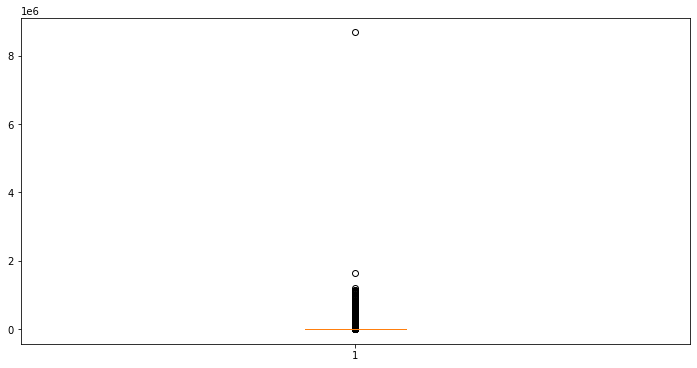

In [46]:
plt.boxplot(df['duration'])

Бачимо, що один явний викид з триивалістю більше 100 днів. Його можна (треба) викинути, щоб не впливав на середнє.

In [48]:
df[df['duration'] == 8685730]

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,started_at_dt,ended_at_dt,start_year
107381,2020-06-12 22:58:29.631000+00:00,2020-09-21 11:40:40.126000+00:00,8685730,424,Birkelunden,langs Seilduksgata,59.925611,10.760926,489,Torggata,ved Bernt Ankers gate,59.915983,10.751551,2020-06-12 22:58:29,2020-09-21 11:40:40,2020


In [49]:
df_1 = df.drop(df[df['duration'] == 8685730].index)

In [50]:
df_1['start_hour'] = df_1['started_at_dt'].apply(lambda x: x.hour)

In [51]:
df_hour_duration_sum = df_1[['duration', 'start_hour']].groupby(['start_hour']).sum()
df_hour_duration_avg = df_1[['duration', 'start_hour']].groupby(['start_hour']).mean()
df_hour_duration_median = df_1[['duration', 'start_hour']].groupby(['start_hour']).median()
df_hour_count = df_1[['duration', 'start_hour']].groupby(['start_hour']).count()

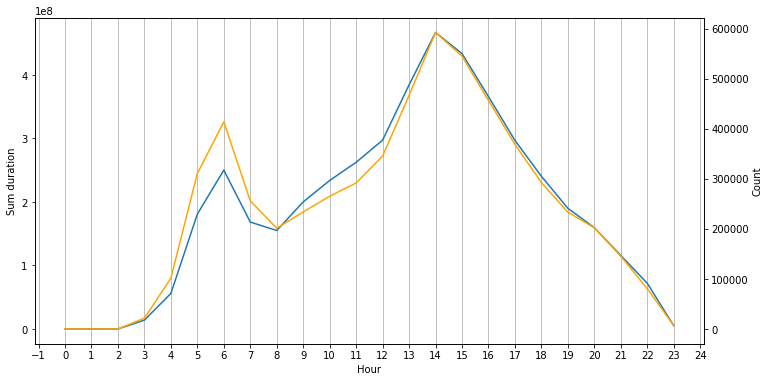

In [57]:
fig, ax = plt.subplots()

ax_l = ax.twinx()
ax.plot(df_hour_duration_sum)
ax.set_ylabel('Sum duration')
ax.set_xlabel('Hour')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.grid(True)
ax_l.plot(df_hour_count, color='orange')
ax_l.set_ylabel('Count')
plt.show()

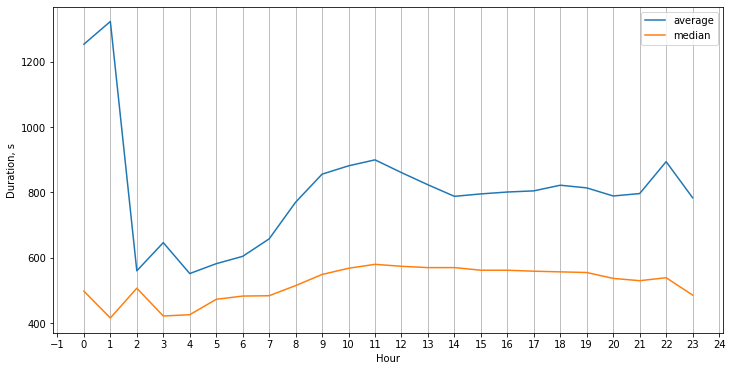

In [63]:
fig, ax = plt.subplots()

ax.plot(df_hour_duration_avg, label='average')
ax.plot(df_hour_duration_median, label='median')
ax.set_xlabel('Hour')
ax.set_ylabel('Duration, s')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.grid(True)
ax.legend()
plt.show()

Презентовані вище дані в таблиці

In [66]:
df_2 = pd.concat([df_hour_duration_sum['duration'].rename('duration_sum'), 
                 df_hour_duration_avg['duration'].rename('duration_mean'), 
                 df_hour_duration_median['duration']. rename('duration_median'),
                 df_hour_count['duration'].rename('count')], 
                axis=1)

In [67]:
df_2

,duration_sum,duration_mean,duration_median,count
start_hour,,,,
0,98986,1252.987342,498.0,79
1,67452,1322.588235,416.0,51
2,10644,560.210526,507.0,19
3,13973987,646.375272,422.0,21619
4,55963869,551.841174,426.0,101413
5,180887174,581.967615,473.0,310820
6,250225469,604.434165,483.0,413983
7,168371891,657.887730,484.0,255928
8,155068028,769.961956,515.0,201397


### Завдання 3
День тижня

In [75]:
df_3 = df_1
df_3['day_of_week'] = df_3['started_at_dt'].apply(lambda x: x.strftime('%w'))
df_3.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude,started_at_dt,ended_at_dt,start_year,start_hour,day_of_week
0,2019-04-02 22:18:47.926000+00:00,2019-04-02 22:24:25.427000+00:00,337,401,Schous plass,nærmest Thorvald Meyers gate,59.920259,10.760629,381,Grønlands torg,ved Tøyenbekken,59.91252,10.76224,2019-04-02 22:18:47,2019-04-02 22:24:25,2019,22,2
1,2019-04-02 22:25:54.203000+00:00,2019-04-02 22:27:36.114000+00:00,101,556,Pilestredet,ved Sporveisgata,59.926224,10.729625,556,Pilestredet,ved Sporveisgata,59.926224,10.729625,2019-04-02 22:25:54,2019-04-02 22:27:36,2019,22,2
2,2019-04-02 22:26:39.308000+00:00,2019-04-02 22:31:59.445000+00:00,320,561,Kirkeveien,nord for Gørbitz' gate,59.933558,10.726426,471,Marienlyst,i Suhms gate,59.932454,10.721769,2019-04-02 22:26:39,2019-04-02 22:31:59,2019,22,2
3,2019-04-03 03:09:58.992000+00:00,2019-04-03 03:12:00.589000+00:00,121,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,59.939244,10.774319,393,Hans Nielsen Hauges plass,Mellom Åsengata og Nordkappgata,59.939244,10.774319,2019-04-03 03:09:58,2019-04-03 03:12:00,2019,3,3
4,2019-04-03 03:10:02.415000+00:00,2019-04-03 03:14:44.537000+00:00,282,597,Fredensborg,ved rundkjøringen,59.920995,10.750358,557,Akersgata,ved Grensen,59.914197,10.742883,2019-04-03 03:10:02,2019-04-03 03:14:44,2019,3,3


In [76]:
df_day_duration_sum = df_3[['duration', 'day_of_week']].groupby(['day_of_week']).sum()
df_day_duration_avg = df_3[['duration', 'day_of_week']].groupby(['day_of_week']).mean()
df_day_duration_median = df_3[['duration', 'day_of_week']].groupby(['day_of_week']).median()
df_day_count = df_3[['duration', 'day_of_week']].groupby(['day_of_week']).count()

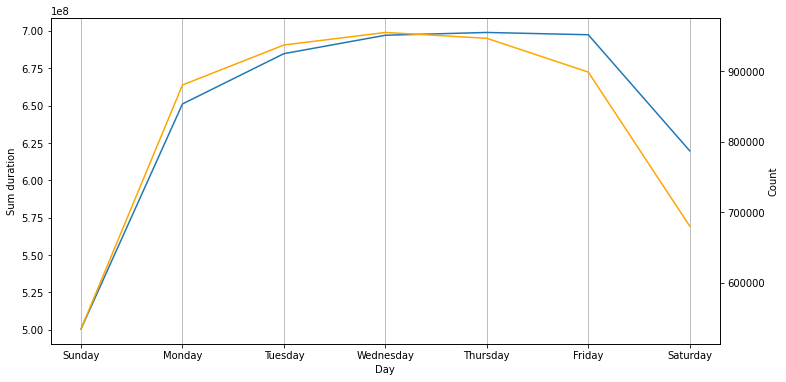

In [82]:
fig, ax = plt.subplots()

ax_l = ax.twinx()
ax.plot(df_day_duration_sum)
ax.set_ylabel('Sum duration')
ax.set_xlabel('Day')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.grid(True)
ax_l.plot(df_day_count, color='orange')
ax_l.set_ylabel('Count')
ax.set_xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
plt.show()

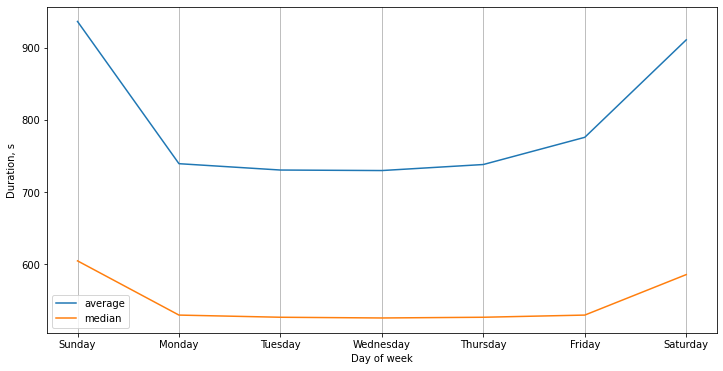

In [83]:
fig, ax = plt.subplots()

ax.plot(df_day_duration_avg, label='average')
ax.plot(df_day_duration_median, label='median')
ax.set_xlabel('Day of week')
ax.set_ylabel('Duration, s')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.grid(True)
ax.set_xticks(range(7), ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
ax.legend()
plt.show()

Тут вже цікаво: Виходитьь, що на вихідниих кількість поїздок зменшується, але їхня тривалість збільшується.